# Defining initial modules

In [26]:
import os

import albumentations 
import matplotlib.pyplot as plt 
from PIL import Image
import numpy

import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Defining data urls

In [27]:
train_images_path = "../data/processed_data/train/images/"
train_image_masks_path = "../data/processed_data/train/masks/"

validation_images_path = "../data/processed_data/train/images/"
validation_image_masks_path = "../data/processed_data/train/masks/"

testing_images_path = "../data/processed_data/train/images/"
testing_image_masks_path = "../data/processed_data/train/masks/"

# Loading small batch of images and masks for initial analysis

In [36]:
def load_files(file_path: str):
    """
    Function loads files from given 'file_path' source
    Args:
        - file_path - path, pointing to the files directory
        - number_of_files - respective number of files to load
    """
    batch = []
    for path in os.listdir(file_path):
        try:
            full_url = os.path.join(file_path, path)
            ext = path.split(".")[-1]
            if ext in ('jpeg', 'png', 'jpg'):
                img_file = Image.open(full_url)
                img_file = numpy.asarray(img_file).astype(numpy.uint8)
                batch.append(img_file)
        except(FileNotFoundError):
            print('file not found: %s' % full_url)
    return batch

# Loading images and corresponding masks for train, validation and testing sets

In [37]:
%%time

train_imgs = load_files(file_path=train_images_path, number_of_files=5)
train_masks = load_files(file_path=train_image_masks_path, number_of_files=5)

CPU times: user 23.5 s, sys: 1.74 s, total: 25.3 s
Wall time: 25.7 s


In [38]:
%%time

validation_imgs = load_files(file_path=validation_images_path, number_of_files=5)
validation_masks = load_files(file_path=validation_image_masks_path, number_of_files=5)

CPU times: user 3.88 s, sys: 311 ms, total: 4.19 s
Wall time: 4.21 s


In [ ]:
%%time

testing_imgs = load_files(file_path=train_images_path, number_of_files=5)
testing_masks = load_files(file_path=train_image_masks_path, number_of_files=5)

# Visualizing images and masks

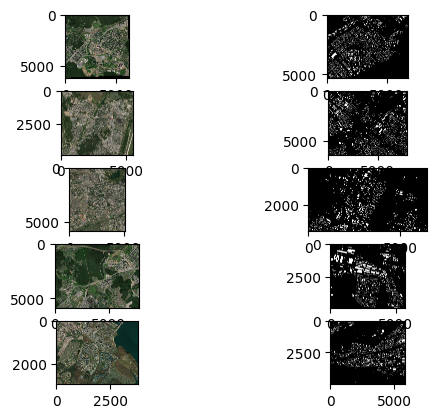

<Figure size 3000x3000 with 0 Axes>

In [45]:
import typing

def visualize_set_of_images(imgs: typing.List, masks: typing.List):
    _, ax = plt.subplots(ncols=2, nrows=5)
    plt.figure(figsize=(30, 30))

    for idx in range(5):
        ax[idx,0].imshow(imgs[idx])
        ax[idx,1].imshow(masks[idx], cmap='gray')

# Visualizing images and masks for training set

In [ ]:
visualize_set_of_images(train_imgs, train_masks)

# Visualizing images and masks for validation set

In [ ]:
visualize_set_of_images(validation_imgs, validation_masks)

# Visualizing images and masks for testing set

In [ ]:
visualize_set_of_images(testing_imgs, testing_masks)

# Defining Augmentation Pipeline

###### Augmentation pipeline predominantely consists of geometrical and structure-based transformations

###### Main idea: we are not going to use any color-based transformations,
###### because the input shape to segmentation models consists of 1 channel (image is entirely grayscaled)
###### that's why in this case scenario, they would not be really helpful.

# Defining Datasets

In [ ]:
from dataset.dataset import SegmentationDataset 

train_dataset = SegmentationDataset(
    imgs=train_imgs,
    masks=train_masks
    transformations=None
)

validation_dataset = SegmentationDataset(
    imgs=validation_imgs,
    masks=validation_masks
    transformations=None
)

testing_dataset = SegmentationDataset(
    imgs=test_imgs,
    masks=test_masks,
    transformations=None
)

# Beginning of experiments.

In [ ]:
### this section consists of several parts: 
### 1. picking loss function 
### 2. picking optimizer and learning rate 
### 3. picking c

# Defining loss functions and evaluation metrics for experiments

In [ ]:
from losses.losses import DiceLoss, FocalLoss, ComboLoss

focal_gamma = 2
dice_loss = DiceLoss()
focal_loss = FiceLoss(gamma=focal_gamma)
combo_loss = ComboLoss(0.3, 0.7, focal_gamma)


In [ ]:
# Defining network for experiment

In [ ]:
network = torch.hub.load('milesial/Pytorch-UNet', 'unet_carvana', pretrained=True, scale=0.5)

In [ ]:
# Defining optimizers and learning rate 

In [ ]:
adam_opt = optim.Adam(lr=learning_rate, weight_decay=0.5)
sgd_opt = optim.SGD(

# Importing network trainer

In [ ]:
trainer = NetworkTrainer(
    network
)